# En este projecto vamos a hacer un red generativa adversaria condicionada 
esta se veria asi:

![](https://i.blogs.es/bd2b76/gan_arquitectura/450_1000.jpg)

 con la diferencia que la parte del descriminador el cual se vera asi

![](https://pbs.twimg.com/media/DiUVLwjV4AAiVZ3?format=png&name=large)

##  import the library

In [1]:
import cv2
import os
import glob

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import *
import os
from IPython.display import clear_output

2021-12-17 23:45:39.159597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/monky/anaconda3/lib/python3.8/site-packages/cv2/../../lib64::/opt/oracle/instantclient_19_8
2021-12-17 23:45:39.159638: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## blur the image

In [11]:
path = r'Dataset_base'
# Busqueda de archivos por extension (.jpg o .png)
imagenes = glob.glob(path + os.sep + '*.png')+glob.glob(path + os.sep + '*.jpg') # Lista de todos los archivos con extension .jpg o .png en la carpeta (imagenes) (ruta entera)
destination = r'Dataset_processed'

def blur(input_image):
    grade=15
    blur = cv2.blur(input_image, (grade, grade))

    return blur

def posterize(input_image):
    n = 3  # Number of levels of quantization

    indices = np.arange(0, 256)  # List of all colors

    divider = np.linspace(0, 255, n + 1)[1]  # we get a divider

    quantiz = np.int0(np.linspace(0, 255, n))  # we get quantization colors

    color_levels = np.clip(np.int0(indices / divider), 0, n - 1)  # color levels 0,1,2..

    palette = quantiz[color_levels]  # Creating the palette

    im2 = palette[input_image]  # Applying palette on image

    im2 = cv2.convertScaleAbs(im2)  # Converting image back to uint8

    return im2


def gaussian_blur(input_image):
    ksize=15
    ksize_width = ksize
    ksize_height = ksize
    # Both must be positive and odd (impar).

    gausBlur = cv2.GaussianBlur(input_image, (ksize, ksize), sigmaX=0)

    return gausBlur


def saturate(input_image):
    # Define mask's boundaries
    color1 = (28, 145, 0)
    color2 = (82, 255, 252)  # Verde

    hsv = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV)

    lower = np.array([color1[0], color1[1], color1[2]])
    upper = np.array([color2[0], color2[1], color2[2]])

    mask = cv2.inRange(hsv, lower, upper)

    background = np.full(input_image.shape, 255, dtype=np.uint8)
    green2black = cv2.bitwise_not(background, input_image, mask=mask)

    return green2black


def save(b=None, p=None, gb=None, s=None):
    for i, img in enumerate(imagenes):
        # print (img) Rutas de todas las imagenes
        # print(img.rsplit(os.sep, 1)[1]) Nombre de todas las imagenes
        filename = img.rsplit(os.sep, 1)[1]
        edit = cv2.imread(img)
        # print(os.path.join(destination, filename)) Rutas de todas las imagenes en el destino

        "ACTIONS"
        if b:
            edit = blur(edit)
        if p:
            edit = posterize(edit)
        if gb:
            edit = gaussian_blur(edit)
        if s:
            edit = saturate(edit)
        cv2.imwrite(os.path.join(destination, filename), edit)
        print(i+1,"de",np.size(imagenes))

if __name__ == "__main__":
    save(b=True, p=True, gb=True, s=True)

1 de 8189
2 de 8189
3 de 8189
4 de 8189
5 de 8189
6 de 8189
7 de 8189
8 de 8189
9 de 8189
10 de 8189
11 de 8189
12 de 8189
13 de 8189
14 de 8189
15 de 8189
16 de 8189
17 de 8189
18 de 8189
19 de 8189
20 de 8189
21 de 8189
22 de 8189
23 de 8189
24 de 8189
25 de 8189
26 de 8189
27 de 8189
28 de 8189
29 de 8189
30 de 8189
31 de 8189
32 de 8189
33 de 8189
34 de 8189
35 de 8189
36 de 8189
37 de 8189
38 de 8189
39 de 8189
40 de 8189
41 de 8189
42 de 8189
43 de 8189
44 de 8189
45 de 8189
46 de 8189
47 de 8189
48 de 8189
49 de 8189
50 de 8189
51 de 8189
52 de 8189
53 de 8189
54 de 8189
55 de 8189
56 de 8189
57 de 8189
58 de 8189
59 de 8189
60 de 8189
61 de 8189
62 de 8189
63 de 8189
64 de 8189
65 de 8189
66 de 8189
67 de 8189
68 de 8189
69 de 8189
70 de 8189
71 de 8189
72 de 8189
73 de 8189
74 de 8189
75 de 8189
76 de 8189
77 de 8189
78 de 8189
79 de 8189
80 de 8189
81 de 8189
82 de 8189
83 de 8189
84 de 8189
85 de 8189
86 de 8189
87 de 8189
88 de 8189
89 de 8189
90 de 8189
91 de 8189
92 de 81

697 de 8189
698 de 8189
699 de 8189
700 de 8189
701 de 8189
702 de 8189
703 de 8189
704 de 8189
705 de 8189
706 de 8189
707 de 8189
708 de 8189
709 de 8189
710 de 8189
711 de 8189
712 de 8189
713 de 8189
714 de 8189
715 de 8189
716 de 8189
717 de 8189
718 de 8189
719 de 8189
720 de 8189
721 de 8189
722 de 8189
723 de 8189
724 de 8189
725 de 8189
726 de 8189
727 de 8189
728 de 8189
729 de 8189
730 de 8189
731 de 8189
732 de 8189
733 de 8189
734 de 8189
735 de 8189
736 de 8189
737 de 8189
738 de 8189
739 de 8189
740 de 8189
741 de 8189
742 de 8189
743 de 8189
744 de 8189
745 de 8189
746 de 8189
747 de 8189
748 de 8189
749 de 8189
750 de 8189
751 de 8189
752 de 8189
753 de 8189
754 de 8189
755 de 8189
756 de 8189
757 de 8189
758 de 8189
759 de 8189
760 de 8189
761 de 8189
762 de 8189
763 de 8189
764 de 8189
765 de 8189
766 de 8189
767 de 8189
768 de 8189
769 de 8189
770 de 8189
771 de 8189
772 de 8189
773 de 8189
774 de 8189
775 de 8189
776 de 8189
777 de 8189
778 de 8189
779 de 8189
780 

1360 de 8189
1361 de 8189
1362 de 8189
1363 de 8189
1364 de 8189
1365 de 8189
1366 de 8189
1367 de 8189
1368 de 8189
1369 de 8189
1370 de 8189
1371 de 8189
1372 de 8189
1373 de 8189
1374 de 8189
1375 de 8189
1376 de 8189
1377 de 8189
1378 de 8189
1379 de 8189
1380 de 8189
1381 de 8189
1382 de 8189
1383 de 8189
1384 de 8189
1385 de 8189
1386 de 8189
1387 de 8189
1388 de 8189
1389 de 8189
1390 de 8189
1391 de 8189
1392 de 8189
1393 de 8189
1394 de 8189
1395 de 8189
1396 de 8189
1397 de 8189
1398 de 8189
1399 de 8189
1400 de 8189
1401 de 8189
1402 de 8189
1403 de 8189
1404 de 8189
1405 de 8189
1406 de 8189
1407 de 8189
1408 de 8189
1409 de 8189
1410 de 8189
1411 de 8189
1412 de 8189
1413 de 8189
1414 de 8189
1415 de 8189
1416 de 8189
1417 de 8189
1418 de 8189
1419 de 8189
1420 de 8189
1421 de 8189
1422 de 8189
1423 de 8189
1424 de 8189
1425 de 8189
1426 de 8189
1427 de 8189
1428 de 8189
1429 de 8189
1430 de 8189
1431 de 8189
1432 de 8189
1433 de 8189
1434 de 8189
1435 de 8189
1436 de 8189

1994 de 8189
1995 de 8189
1996 de 8189
1997 de 8189
1998 de 8189
1999 de 8189
2000 de 8189
2001 de 8189
2002 de 8189
2003 de 8189
2004 de 8189
2005 de 8189
2006 de 8189
2007 de 8189
2008 de 8189
2009 de 8189
2010 de 8189
2011 de 8189
2012 de 8189
2013 de 8189
2014 de 8189
2015 de 8189
2016 de 8189
2017 de 8189
2018 de 8189
2019 de 8189
2020 de 8189
2021 de 8189
2022 de 8189
2023 de 8189
2024 de 8189
2025 de 8189
2026 de 8189
2027 de 8189
2028 de 8189
2029 de 8189
2030 de 8189
2031 de 8189
2032 de 8189
2033 de 8189
2034 de 8189
2035 de 8189
2036 de 8189
2037 de 8189
2038 de 8189
2039 de 8189
2040 de 8189
2041 de 8189
2042 de 8189
2043 de 8189
2044 de 8189
2045 de 8189
2046 de 8189
2047 de 8189
2048 de 8189
2049 de 8189
2050 de 8189
2051 de 8189
2052 de 8189
2053 de 8189
2054 de 8189
2055 de 8189
2056 de 8189
2057 de 8189
2058 de 8189
2059 de 8189
2060 de 8189
2061 de 8189
2062 de 8189
2063 de 8189
2064 de 8189
2065 de 8189
2066 de 8189
2067 de 8189
2068 de 8189
2069 de 8189
2070 de 8189

2630 de 8189
2631 de 8189
2632 de 8189
2633 de 8189
2634 de 8189
2635 de 8189
2636 de 8189
2637 de 8189
2638 de 8189
2639 de 8189
2640 de 8189
2641 de 8189
2642 de 8189
2643 de 8189
2644 de 8189
2645 de 8189
2646 de 8189
2647 de 8189
2648 de 8189
2649 de 8189
2650 de 8189
2651 de 8189
2652 de 8189
2653 de 8189
2654 de 8189
2655 de 8189
2656 de 8189
2657 de 8189
2658 de 8189
2659 de 8189
2660 de 8189
2661 de 8189
2662 de 8189
2663 de 8189
2664 de 8189
2665 de 8189
2666 de 8189
2667 de 8189
2668 de 8189
2669 de 8189
2670 de 8189
2671 de 8189
2672 de 8189
2673 de 8189
2674 de 8189
2675 de 8189
2676 de 8189
2677 de 8189
2678 de 8189
2679 de 8189
2680 de 8189
2681 de 8189
2682 de 8189
2683 de 8189
2684 de 8189
2685 de 8189
2686 de 8189
2687 de 8189
2688 de 8189
2689 de 8189
2690 de 8189
2691 de 8189
2692 de 8189
2693 de 8189
2694 de 8189
2695 de 8189
2696 de 8189
2697 de 8189
2698 de 8189
2699 de 8189
2700 de 8189
2701 de 8189
2702 de 8189
2703 de 8189
2704 de 8189
2705 de 8189
2706 de 8189

3263 de 8189
3264 de 8189
3265 de 8189
3266 de 8189
3267 de 8189
3268 de 8189
3269 de 8189
3270 de 8189
3271 de 8189
3272 de 8189
3273 de 8189
3274 de 8189
3275 de 8189
3276 de 8189
3277 de 8189
3278 de 8189
3279 de 8189
3280 de 8189
3281 de 8189
3282 de 8189
3283 de 8189
3284 de 8189
3285 de 8189
3286 de 8189
3287 de 8189
3288 de 8189
3289 de 8189
3290 de 8189
3291 de 8189
3292 de 8189
3293 de 8189
3294 de 8189
3295 de 8189
3296 de 8189
3297 de 8189
3298 de 8189
3299 de 8189
3300 de 8189
3301 de 8189
3302 de 8189
3303 de 8189
3304 de 8189
3305 de 8189
3306 de 8189
3307 de 8189
3308 de 8189
3309 de 8189
3310 de 8189
3311 de 8189
3312 de 8189
3313 de 8189
3314 de 8189
3315 de 8189
3316 de 8189
3317 de 8189
3318 de 8189
3319 de 8189
3320 de 8189
3321 de 8189
3322 de 8189
3323 de 8189
3324 de 8189
3325 de 8189
3326 de 8189
3327 de 8189
3328 de 8189
3329 de 8189
3330 de 8189
3331 de 8189
3332 de 8189
3333 de 8189
3334 de 8189
3335 de 8189
3336 de 8189
3337 de 8189
3338 de 8189
3339 de 8189

3901 de 8189
3902 de 8189
3903 de 8189
3904 de 8189
3905 de 8189
3906 de 8189
3907 de 8189
3908 de 8189
3909 de 8189
3910 de 8189
3911 de 8189
3912 de 8189
3913 de 8189
3914 de 8189
3915 de 8189
3916 de 8189
3917 de 8189
3918 de 8189
3919 de 8189
3920 de 8189
3921 de 8189
3922 de 8189
3923 de 8189
3924 de 8189
3925 de 8189
3926 de 8189
3927 de 8189
3928 de 8189
3929 de 8189
3930 de 8189
3931 de 8189
3932 de 8189
3933 de 8189
3934 de 8189
3935 de 8189
3936 de 8189
3937 de 8189
3938 de 8189
3939 de 8189
3940 de 8189
3941 de 8189
3942 de 8189
3943 de 8189
3944 de 8189
3945 de 8189
3946 de 8189
3947 de 8189
3948 de 8189
3949 de 8189
3950 de 8189
3951 de 8189
3952 de 8189
3953 de 8189
3954 de 8189
3955 de 8189
3956 de 8189
3957 de 8189
3958 de 8189
3959 de 8189
3960 de 8189
3961 de 8189
3962 de 8189
3963 de 8189
3964 de 8189
3965 de 8189
3966 de 8189
3967 de 8189
3968 de 8189
3969 de 8189
3970 de 8189
3971 de 8189
3972 de 8189
3973 de 8189
3974 de 8189
3975 de 8189
3976 de 8189
3977 de 8189

4535 de 8189
4536 de 8189
4537 de 8189
4538 de 8189
4539 de 8189
4540 de 8189
4541 de 8189
4542 de 8189
4543 de 8189
4544 de 8189
4545 de 8189
4546 de 8189
4547 de 8189
4548 de 8189
4549 de 8189
4550 de 8189
4551 de 8189
4552 de 8189
4553 de 8189
4554 de 8189
4555 de 8189
4556 de 8189
4557 de 8189
4558 de 8189
4559 de 8189
4560 de 8189
4561 de 8189
4562 de 8189
4563 de 8189
4564 de 8189
4565 de 8189
4566 de 8189
4567 de 8189
4568 de 8189
4569 de 8189
4570 de 8189
4571 de 8189
4572 de 8189
4573 de 8189
4574 de 8189
4575 de 8189
4576 de 8189
4577 de 8189
4578 de 8189
4579 de 8189
4580 de 8189
4581 de 8189
4582 de 8189
4583 de 8189
4584 de 8189
4585 de 8189
4586 de 8189
4587 de 8189
4588 de 8189
4589 de 8189
4590 de 8189
4591 de 8189
4592 de 8189
4593 de 8189
4594 de 8189
4595 de 8189
4596 de 8189
4597 de 8189
4598 de 8189
4599 de 8189
4600 de 8189
4601 de 8189
4602 de 8189
4603 de 8189
4604 de 8189
4605 de 8189
4606 de 8189
4607 de 8189
4608 de 8189
4609 de 8189
4610 de 8189
4611 de 8189

5170 de 8189
5171 de 8189
5172 de 8189
5173 de 8189
5174 de 8189
5175 de 8189
5176 de 8189
5177 de 8189
5178 de 8189
5179 de 8189
5180 de 8189
5181 de 8189
5182 de 8189
5183 de 8189
5184 de 8189
5185 de 8189
5186 de 8189
5187 de 8189
5188 de 8189
5189 de 8189
5190 de 8189
5191 de 8189
5192 de 8189
5193 de 8189
5194 de 8189
5195 de 8189
5196 de 8189
5197 de 8189
5198 de 8189
5199 de 8189
5200 de 8189
5201 de 8189
5202 de 8189
5203 de 8189
5204 de 8189
5205 de 8189
5206 de 8189
5207 de 8189
5208 de 8189
5209 de 8189
5210 de 8189
5211 de 8189
5212 de 8189
5213 de 8189
5214 de 8189
5215 de 8189
5216 de 8189
5217 de 8189
5218 de 8189
5219 de 8189
5220 de 8189
5221 de 8189
5222 de 8189
5223 de 8189
5224 de 8189
5225 de 8189
5226 de 8189
5227 de 8189
5228 de 8189
5229 de 8189
5230 de 8189
5231 de 8189
5232 de 8189
5233 de 8189
5234 de 8189
5235 de 8189
5236 de 8189
5237 de 8189
5238 de 8189
5239 de 8189
5240 de 8189
5241 de 8189
5242 de 8189
5243 de 8189
5244 de 8189
5245 de 8189
5246 de 8189

5804 de 8189
5805 de 8189
5806 de 8189
5807 de 8189
5808 de 8189
5809 de 8189
5810 de 8189
5811 de 8189
5812 de 8189
5813 de 8189
5814 de 8189
5815 de 8189
5816 de 8189
5817 de 8189
5818 de 8189
5819 de 8189
5820 de 8189
5821 de 8189
5822 de 8189
5823 de 8189
5824 de 8189
5825 de 8189
5826 de 8189
5827 de 8189
5828 de 8189
5829 de 8189
5830 de 8189
5831 de 8189
5832 de 8189
5833 de 8189
5834 de 8189
5835 de 8189
5836 de 8189
5837 de 8189
5838 de 8189
5839 de 8189
5840 de 8189
5841 de 8189
5842 de 8189
5843 de 8189
5844 de 8189
5845 de 8189
5846 de 8189
5847 de 8189
5848 de 8189
5849 de 8189
5850 de 8189
5851 de 8189
5852 de 8189
5853 de 8189
5854 de 8189
5855 de 8189
5856 de 8189
5857 de 8189
5858 de 8189
5859 de 8189
5860 de 8189
5861 de 8189
5862 de 8189
5863 de 8189
5864 de 8189
5865 de 8189
5866 de 8189
5867 de 8189
5868 de 8189
5869 de 8189
5870 de 8189
5871 de 8189
5872 de 8189
5873 de 8189
5874 de 8189
5875 de 8189
5876 de 8189
5877 de 8189
5878 de 8189
5879 de 8189
5880 de 8189

6436 de 8189
6437 de 8189
6438 de 8189
6439 de 8189
6440 de 8189
6441 de 8189
6442 de 8189
6443 de 8189
6444 de 8189
6445 de 8189
6446 de 8189
6447 de 8189
6448 de 8189
6449 de 8189
6450 de 8189
6451 de 8189
6452 de 8189
6453 de 8189
6454 de 8189
6455 de 8189
6456 de 8189
6457 de 8189
6458 de 8189
6459 de 8189
6460 de 8189
6461 de 8189
6462 de 8189
6463 de 8189
6464 de 8189
6465 de 8189
6466 de 8189
6467 de 8189
6468 de 8189
6469 de 8189
6470 de 8189
6471 de 8189
6472 de 8189
6473 de 8189
6474 de 8189
6475 de 8189
6476 de 8189
6477 de 8189
6478 de 8189
6479 de 8189
6480 de 8189
6481 de 8189
6482 de 8189
6483 de 8189
6484 de 8189
6485 de 8189
6486 de 8189
6487 de 8189
6488 de 8189
6489 de 8189
6490 de 8189
6491 de 8189
6492 de 8189
6493 de 8189
6494 de 8189
6495 de 8189
6496 de 8189
6497 de 8189
6498 de 8189
6499 de 8189
6500 de 8189
6501 de 8189
6502 de 8189
6503 de 8189
6504 de 8189
6505 de 8189
6506 de 8189
6507 de 8189
6508 de 8189
6509 de 8189
6510 de 8189
6511 de 8189
6512 de 8189

7073 de 8189
7074 de 8189
7075 de 8189
7076 de 8189
7077 de 8189
7078 de 8189
7079 de 8189
7080 de 8189
7081 de 8189
7082 de 8189
7083 de 8189
7084 de 8189
7085 de 8189
7086 de 8189
7087 de 8189
7088 de 8189
7089 de 8189
7090 de 8189
7091 de 8189
7092 de 8189
7093 de 8189
7094 de 8189
7095 de 8189
7096 de 8189
7097 de 8189
7098 de 8189
7099 de 8189
7100 de 8189
7101 de 8189
7102 de 8189
7103 de 8189
7104 de 8189
7105 de 8189
7106 de 8189
7107 de 8189
7108 de 8189
7109 de 8189
7110 de 8189
7111 de 8189
7112 de 8189
7113 de 8189
7114 de 8189
7115 de 8189
7116 de 8189
7117 de 8189
7118 de 8189
7119 de 8189
7120 de 8189
7121 de 8189
7122 de 8189
7123 de 8189
7124 de 8189
7125 de 8189
7126 de 8189
7127 de 8189
7128 de 8189
7129 de 8189
7130 de 8189
7131 de 8189
7132 de 8189
7133 de 8189
7134 de 8189
7135 de 8189
7136 de 8189
7137 de 8189
7138 de 8189
7139 de 8189
7140 de 8189
7141 de 8189
7142 de 8189
7143 de 8189
7144 de 8189
7145 de 8189
7146 de 8189
7147 de 8189
7148 de 8189
7149 de 8189

7707 de 8189
7708 de 8189
7709 de 8189
7710 de 8189
7711 de 8189
7712 de 8189
7713 de 8189
7714 de 8189
7715 de 8189
7716 de 8189
7717 de 8189
7718 de 8189
7719 de 8189
7720 de 8189
7721 de 8189
7722 de 8189
7723 de 8189
7724 de 8189
7725 de 8189
7726 de 8189
7727 de 8189
7728 de 8189
7729 de 8189
7730 de 8189
7731 de 8189
7732 de 8189
7733 de 8189
7734 de 8189
7735 de 8189
7736 de 8189
7737 de 8189
7738 de 8189
7739 de 8189
7740 de 8189
7741 de 8189
7742 de 8189
7743 de 8189
7744 de 8189
7745 de 8189
7746 de 8189
7747 de 8189
7748 de 8189
7749 de 8189
7750 de 8189
7751 de 8189
7752 de 8189
7753 de 8189
7754 de 8189
7755 de 8189
7756 de 8189
7757 de 8189
7758 de 8189
7759 de 8189
7760 de 8189
7761 de 8189
7762 de 8189
7763 de 8189
7764 de 8189
7765 de 8189
7766 de 8189
7767 de 8189
7768 de 8189
7769 de 8189
7770 de 8189
7771 de 8189
7772 de 8189
7773 de 8189
7774 de 8189
7775 de 8189
7776 de 8189
7777 de 8189
7778 de 8189
7779 de 8189
7780 de 8189
7781 de 8189
7782 de 8189
7783 de 8189

In [2]:
INPATH  = 'Dataset_processed'#Carpeta con imagenes distorcionadas
OUTPATH = 'Dataset_base'    #Carpeta con imagenes originales
CHECKP  = 'checkpoints'      #Carpeta de checkpoints

#guardar las imagenes en inpaht en una lista
imgurls = !ls -1 "{INPATH}"

#número de datos a utilizar
n = 500

#particiones el 80% de los datos para entrenamiento
train_n = round(n*0.80)

#Listado randomizado 
randurls = np.copy(imgurls)

#Particiom train/tet
tr_urls = randurls[:train_n]
ts_urls = randurls[train_n:n]

np.random.seed(23)# This is onli for the tutorail
np.random.shuffle(randurls)


#print("Cantidad de datos totales:",len(imgurls),"\nDatos a usar:",len(tr_urls),"\nDatos para testeo",len(ts_urls))
print(len(imgurls),len(tr_urls),len(ts_urls))


8189 400 100


2021-12-17 23:45:43.369248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/monky/anaconda3/lib/python3.8/site-packages/cv2/../../lib64::/opt/oracle/instantclient_19_8
2021-12-17 23:45:43.369303: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-17 23:45:43.369327: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (virtual-machine): /proc/driver/nvidia/version does not exist
2021-12-17 23:45:43.369859: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compile

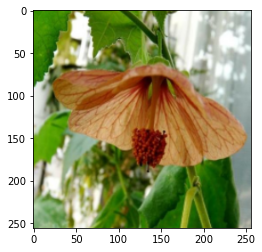

In [3]:
#rescalar imagenes
IMG_WIDTH = 256
IMG_HEIGHT = 256

def resize(inimg,tgimg,height,width):
    
    inimg = tf.image.resize(inimg,[height,width])
    tgimg = tf.image.resize(tgimg,[height,width])
    return inimg,tgimg
#normaliza el rango[-1, +1]

def normalize(inimg,tgimg):
    inimg = (inimg / 127.5) - 1
    tgimg = (tgimg / 127.5) - 1
    return inimg,tgimg


#aumentacion de datos :random crop+flip
def random_jitter(inimg,tgimg):
  
    inimg,tgimg = resize(inimg,tgimg,286,286)
  
    stacked_image = tf.stack([inimg,tgimg], axis = 0)
    cropped_image = tf.image.random_crop(stacked_image, size = [2,IMG_HEIGHT,IMG_WIDTH,3])#funcion de recorte aletorio
  
    inimg,tgimg = cropped_image[0],cropped_image[1]
  
    if tf.random.uniform(()) > 0.5:#Ramdom flip
        inimg = tf.image.flip_left_right(inimg)
        tgimg = tf.image.flip_left_right(tgimg)
    
    return inimg,tgimg

def load_image(filename,augment=True):
    inimg=tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH+'/'+filename)),tf.float32)[..., :3]
  
    tgimg=tf.cast(tf.image.decode_jpeg(tf.io.read_file(OUTPATH+'/'+filename)),tf.float32)[..., :3]
  
    inimg,tgimg=resize(inimg,tgimg,IMG_HEIGHT,IMG_WIDTH)
    
    if augment:
        inimg,tgimg = random_jitter(inimg,tgimg)
    inimg,tgimg= normalize(inimg,tgimg)
    return inimg, tgimg      

def load_train_image(filename):
    return load_image(filename,True)

def load_test_image(filename):
    return load_image(filename,False)

plt.imshow(((load_train_image(randurls[0])[1]) + 1) / 2) 


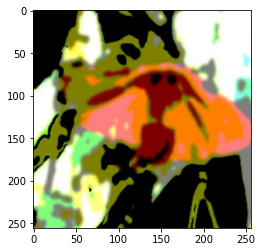

In [4]:
plt.imshow(((load_train_image(randurls[0])[0]) + 1) / 2) 

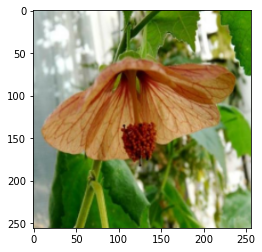

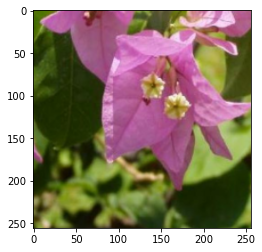

In [5]:
#aqui creamos un dataset de entrenamiento usando nuestro listado de nombres de images
train_dataset = tf.data.Dataset.from_tensor_slices(tr_urls)

#aqui hacemos el mapeo entre el listado del nombre de nuestras imagenes y las funciones que tenemos especificadas arriba
#Con "num_parallel_calls" especificamos el numero de procesamiento en paralelo(en este caso dejamos que tensorflow decida)
train_dataset = train_dataset.map(load_train_image, num_parallel_calls = tf.data.experimental.AUTOTUNE)

#aqui distribuimos el tamaño del dataset en lotes de 1
train_dataset = train_dataset.batch(1)

#aqui hacemos una consulta de 5 lotes en nuestro dataset, y mostramos cada una de las imganemos atravez de un bucle "for" 
for inimg, tgimg in train_dataset.take(2):
    plt.imshow(((tgimg[0,...]) + 1) / 2)
    plt.show()
    
    
#aqui creamos un dataset de testeo usando nuestro listado de nombres de images
test_dataset = tf.data.Dataset.from_tensor_slices(tr_urls)

#aqui hacemos el mapeo entre el listado del nombre de nuestras imagenes y las funciones que tenemos especificadas arriba
#Con "num_parallel_calls" especificamos el numero de procesamiento en paralelo(en este caso dejamos que tensorflow decida)
test_dataset = test_dataset.map(load_train_image, num_parallel_calls = tf.data.experimental.AUTOTUNE)

#aqui distribuimos el tamaño del dataset en lotes de 1
test_dataset = test_dataset.batch(1)




## vamos acrear nuestro generador

In [6]:
def downsample(filters, apply_batchnorm = True):
    result = Sequential()
    
    initializer = tf.random_normal_initializer(0, 0.02)
    
    #capa convolucional
    result.add(Conv2D(filters,
                  kernel_size = 4,
                  strides = 2,
                  padding = "same",
                  kernel_initializer = initializer,
                  #aqui le desimos que añada un parametro de sesgo simpre que no apliquemos antes una capa de normalizacion(por que esta ya lo añade)
                  use_bias = not apply_batchnorm))
    
    if apply_batchnorm:
        #capa de batchNorm
        result.add(BatchNormalization())

    #capa de activacion
    result.add(LeakyReLU())
    
    return result

downsample(64)

In [7]:
def upsample(filters, apply_dropout = False):
    result = Sequential()
    
    initializer = tf.random_normal_initializer(0, 0.02)
    
    #capa convolucional
    result.add(Conv2DTranspose(filters,
                              kernel_size = 4,
                              strides = 2,
                              padding = "same",
                              kernel_initializer = initializer,
                              use_bias = False))
    
    #capa de batchNorm
    result.add(BatchNormalization())

    if apply_dropout:
        pass
    
    #capa de activacion
    result.add(ReLU())
    
    return result

upsample(64)

In [8]:
def Generator():
    #aqui ponemos la altura, el ancho y los canales de color en este caso 3 por que son rgb
    #(dejamos el alto y en ancho como "None" para que estos puedan variar a lo largo del tiempo)
    inputs = tf.keras.layers.Input(shape = [None,None,3])
    
   
    
    down_stack = [                           #Aqui podemos ver como las dimensiones de nuestra imagen se van reduciendo(considerando que la imagen inicial es de 256*256) 
                                            #el primer numero el alto, el segundo el ancho, y el tercero son los filtros aplicados
    downsample(64, apply_batchnorm = False), #(bs, 128, 128, 64)
    downsample(128),                         #(bs, 64, 64, 128)
    downsample(256),                         #(bs, 32, 32, 256)
    downsample(512),                         #(bs, 16, 16, 512)
    downsample(512),                         #(bs, 8, 8,   512)
    downsample(512),                         #(bs, 4, 4,   512)
    downsample(512),                         #(bs, 2, 2,   512)
    downsample(512),                         #(bs, 1, 1,   512)
    ]

    up_stack = [                             #Aqui podemos ver como las dimensiones de nuestra imagen se van Aunmentando(considerando que la imagen inicial es de 256*256)
                                             #el primer numero el alto, el segundo el ancho, y el tercero son los alplificadores aplicados
    upsample(512, apply_dropout = True),     #(bs, 2, 2,   1024)
    upsample(512, apply_dropout = True),     #(bs, 4, 4,   1024)
    upsample(512, apply_dropout = True),     #(bs, 8, 8,   1024)
    upsample(512),                           #(bs, 16, 16, 1024)
    upsample(256),                           #(bs, 32, 32, 256)
    upsample(128),                           #(bs, 64, 64, 128)
    upsample(64),                            #(bs, 128, 128, 64)
    ]
    
    initializer = tf.random_normal_initializer(0., 0.02)
    
    #esta ultima capa se va a encargar de generar la imagen final
    last = Conv2DTranspose(filters = 3,
                          kernel_size = 4,
                          strides = 2,
                          padding = "same",
                          kernel_initializer = initializer,
                          activation = "tanh")
                
    #aqui guardamos nuestros "inputs" iniciales en la varible x
    x = inputs
    
    #aqui creamos un listas que almacenara los datos de cada transformacion
    s = []
    
    
    #aqui iteramos entra cada una de nuestras capas de "downsample" y le pasamos el output de la anterior como input a la siguiente
    #ademas usamos nuestra varible "x" como input inicial
    for down in down_stack:
        x = down(x)
        #aqui agregamos cada una de las transformaciones a mi lista "s"
        s.append(x)
    
    #aqui ponemos al reves mi lista y borramos los datos centrales
    #esto lo hacemos para que los datos de mi primera transformacion(de "down_stack") llegen a mi ultima transformacion(de up_stack)
    #gracias a esto vamos a poder generar las llamadas "skill connection"
    s = reversed(s[:-1])
    
    #aqui iteramos entra cada una de nuestras capas de "upsample" y le pasamos el de la anterior output como input a la siguiente
    for up, sk in zip(up_stack, s):
        x = up(x)
        
        #Aqui terminamos de crear las llamadas "skill connection"
        #conectando el resultado de mi transformacion con los datos almacendos me mi listas
        x = tf.keras.layers.Concatenate()([x, sk])
    last = last(x)
    
    return  Model(inputs = inputs, outputs = last)

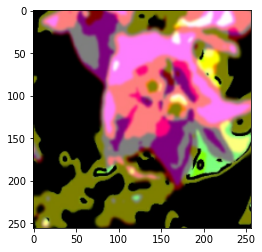

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


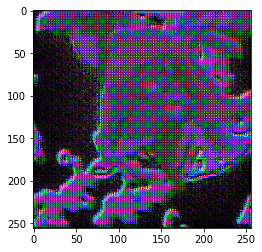

In [9]:
generator=Generator()
gen_output=generator(((inimg+1)*255), training=False)
plt.imshow(((inimg[0,...]) + 1) /2)#mostramos una imagen con colores
plt.show()
plt.imshow(gen_output[0,...])#mostramos una imagen "cruda"

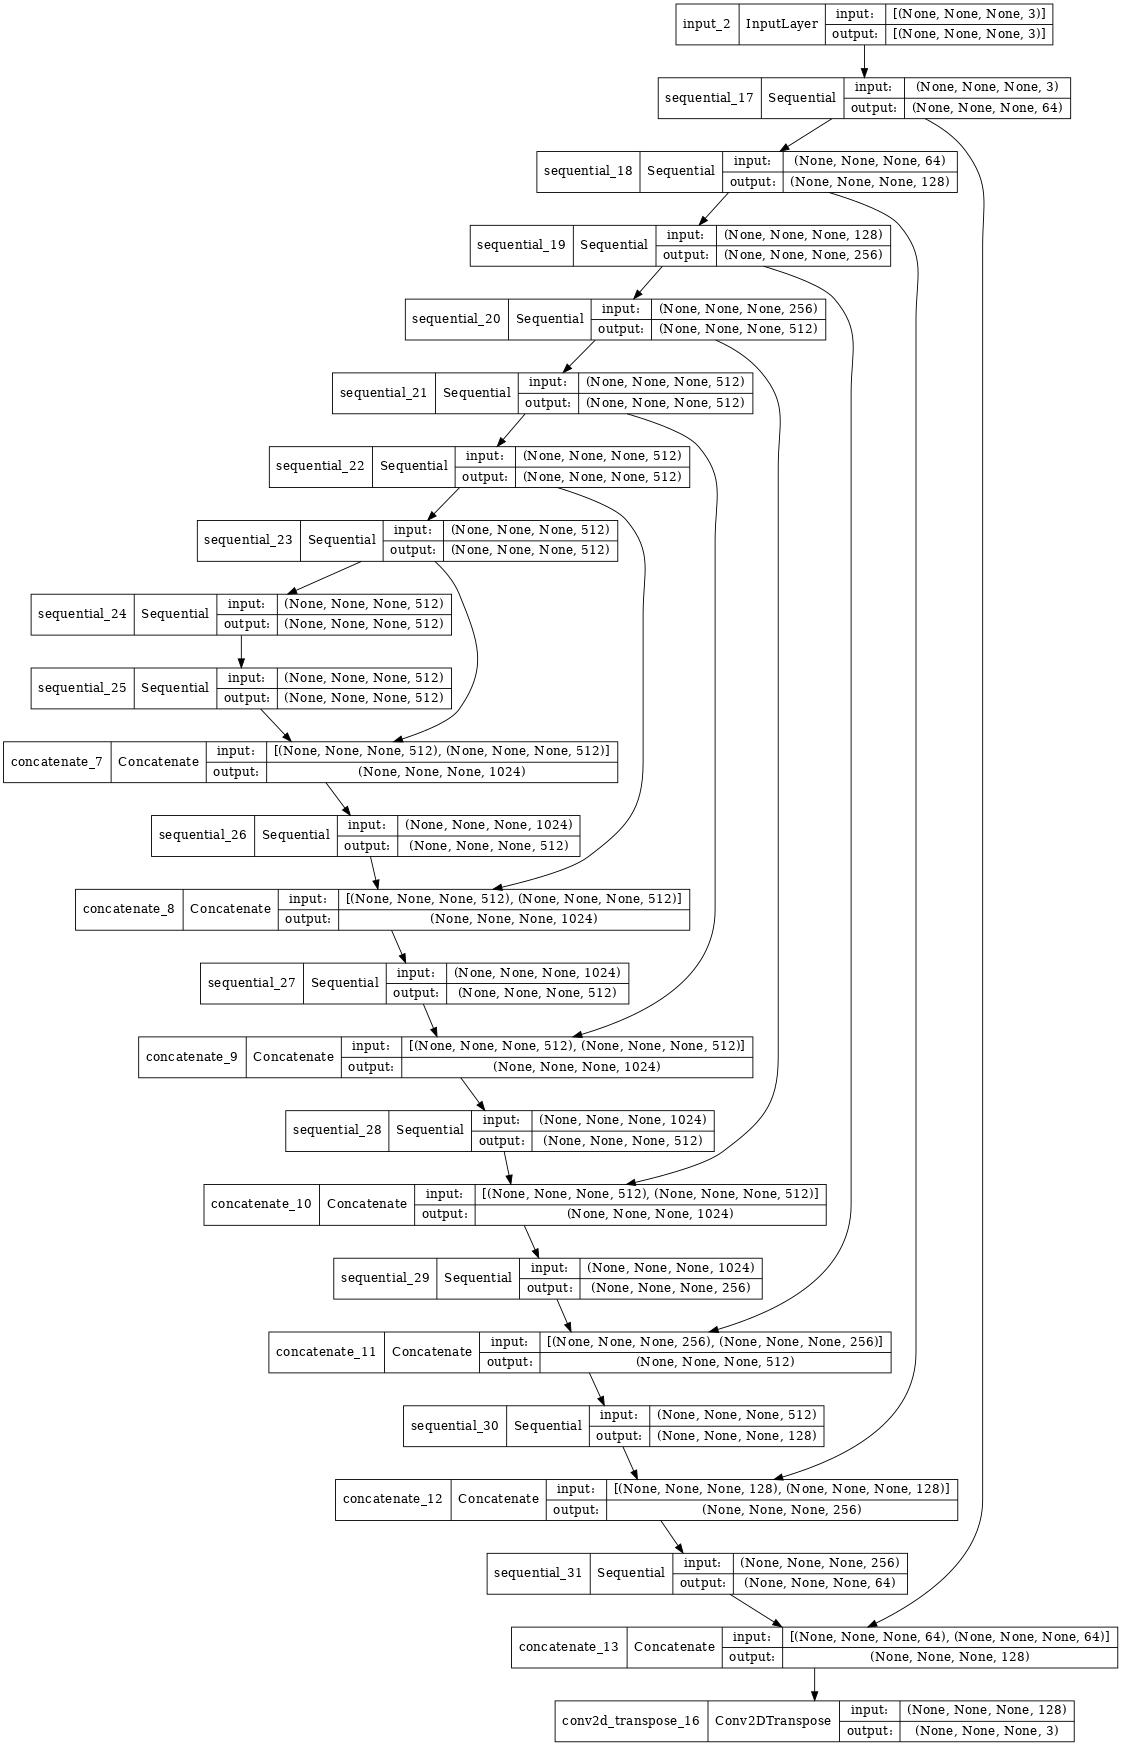

In [10]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes = True, dpi = 64)

# Ya por fin hemos terminado nuestro generador
![](https://pbs.twimg.com/media/DiUVLwjV4AAiVZ3?format=png&name=large)

## Ahora crearemos nuestro discrminador condicional tipo "PATCHGAN"

In [11]:
def Discriminator():
    ini = Input(shape = [None, None, 3], name = "input_img")
    gen = Input(shape = [None, None, 3], name = "gener_img")
    
    con = concatenate([ini, gen])
    
    initializer = tf.random_normal_initializer(0, 0.02)
    
    down1 = downsample(64, apply_batchnorm = False)(con)
    down2 = downsample(128)(down1)
    down3 = downsample(256)(down2)
    #donw4 = downsample(512)(down3)
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)
    
    conv = tf.keras.layers.Conv2D(filters = 512,
                                  kernel_size = 4, 
                                  strides = 1,
                                  kernel_initializer = initializer,
                                  use_bias = False)(zero_pad1)  # (batch_size, 31, 31, 512)
    
    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)

    last = tf.keras.layers.Conv2D(filters = 1, 
                                  kernel_size = 4, 
                                  strides = 1,
                                  kernel_initializer = initializer)(zero_pad2)
    
    
    
    return tf.keras.Model(inputs = [ini, gen], outputs = last)

TensorShape([1, 30, 30, 1])

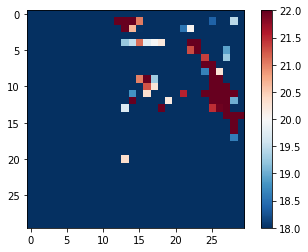

In [12]:
#Hacemos un mapa de calor con nuestro discriminador para ver que ten real o faso son los pixeles una imagen
#mas "caliente" es mas real, mas "frio" es menos real
discriminator=Discriminator()       
disc_out=discriminator([((inimg+1)*255),gen_output], training=False)
plt.imshow(disc_out[0,...,-1],vmin=20,vmax=20,cmap='RdBu_r')
plt.colorbar()
disc_out.shape  

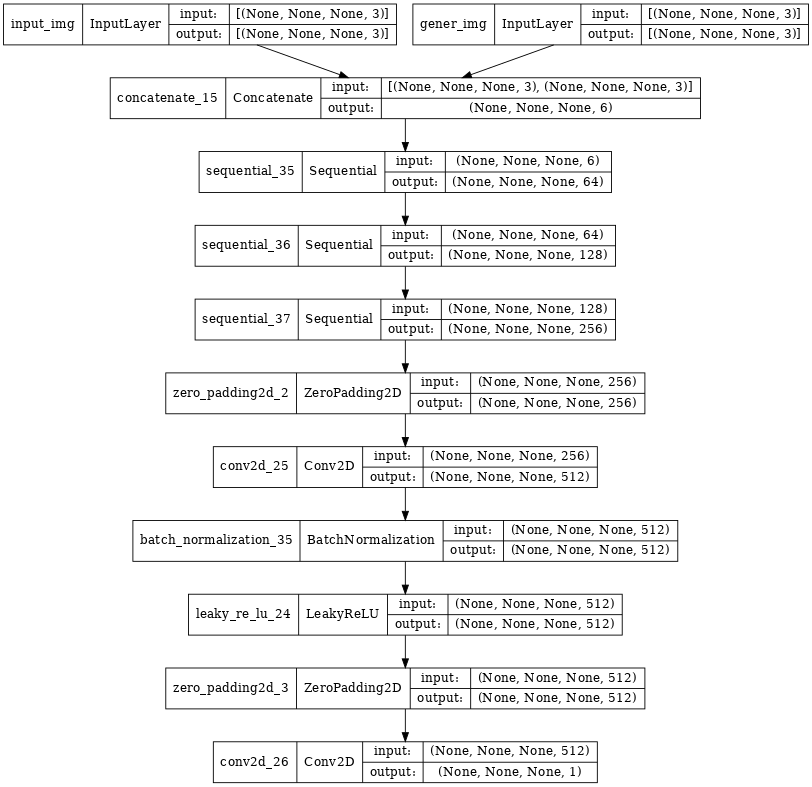

In [13]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes = True, dpi = 64)

# Ya por fin hemos terminado nuestro Discriminador


## Ahora vamos a hacer nuestra funcion de coste

In [14]:
#Aqui vamos a calcular la entropia cruzadaa de cada uno de nuestros pixeles atrves de la libreria(from_logits)
#Aqui pones el parametro "from_logits" en True para que las imagenes se normalizen en el dominio de 0 y 1
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [15]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

In [16]:
LAMBDA = 100

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

In [17]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                                 discriminator_optimizer = discriminator_optimizer,
                                 generator = generator,
                                 discriminator = discriminator)

In [18]:
def generate_images(model, test_input, tar, save_filename = False, display_imgs = True):
    prediction = model(test_input, training = True)
    
    if save_filename:
        tf.keras.preprocessing.image.save_img(CHECKP+ "/" + save_filename + ".jpg", prediction[0,...])
    
    plt.figure(figsize = (10, 10))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    
    if display_imgs:
        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.title(title[i])
            # Getting the pixel values in the [0, 1] range to plot.
            plt.imshow(display_list[i] * 0.5 + 0.5)#/255.0)
            plt.axis('off')
        plt.show()

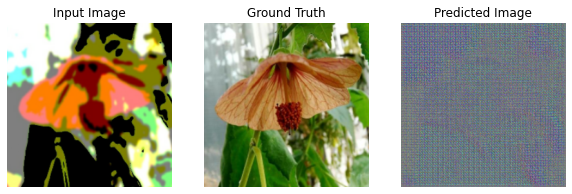

In [19]:
#aqui podemos ver un ejemplo de 
for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)

In [20]:
@tf.function

def train_step(input_image, target):
    
    #llamamos a la libreria "tf.GrandientTape()" para calculae de forma auntomatica los gradietes
    #esto es nesesario para optimizar nestro algoritmo
    with tf.GradientTape() as gen_tape, tf.GradientTape() as discr_tape:
        
        #Aqui le pasamos una imagen de entrenamiento al generador
        #y guardamos su salida en la variable "output_image"
        output_image = generator([input_image,], training = True)

        #Aqui le pasamos la imagen creada por el generador al discriminador y la imagen de entrada(input_image)
        output_gen_discr = discriminator([output_image, input_image], training = True)


        #Ademas aqui le pasamos al discriminador nuestra imagen esperada(target) y la imagen de entrada(input_image) 
        output_trg_discr = discriminator([target, input_image], training = True)

        #calcularmos la perdida de nuestro discrminador(usando la funcion discriminator_loss)
        #y lo almacenomes en la variable "discr_loss"
        discr_loss = discriminator_loss(output_trg_discr, output_gen_discr)

        #alcularmos la perdida de nuestro generador(usando la funcion generator_loss)
        #y lo almacenomes en la variable "gen_loss"
        gen_loss = generator_loss(output_gen_discr, output_image, target)
        
        #Calculamos los gradiente de nuestro generador
        generator_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
        
        #Calculamos los gradiente de nuestro discrminador
        discrminator_grads = discr_tape.gradient(discr_loss, discriminator.trainable_variables)
        
        #Generamos nuestro optimizador del generador
        generator_optimizer.apply_gradients(zip(generator_grads, generator.trainable_variables))
        
        #Generamos nuestro optimizador del discriminador
        discriminator_optimizer.apply_gradients(zip(discrminator_grads, discriminator.trainable_variables))

In [21]:
def train(dataset, epochs):
    for epoch in range(epochs):
        imgi = 0
        for  input_image, target in dataset:
            print("epoch" + str(epoch) + "- train:" + str(imgi) + "/" +str(len(tr_urls))) 
            imgi += 1
            train_step(input_image, target)
        
            clear_output(wait = True)
        for inp, tar in test_dataset.take(5):
            generate_images(generator, inp, tar, str(imgi) + "_" + str(epoch), display_imgs = True)
    
        #saving (checkpoint) the model every 20 epochs
        if (epoch + 1) % 10 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

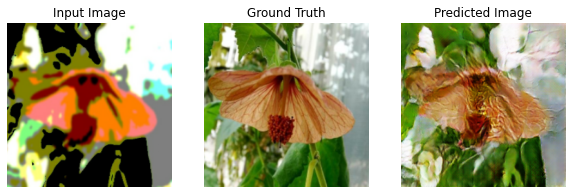

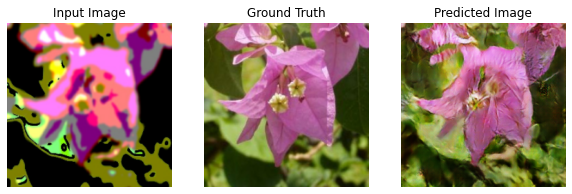

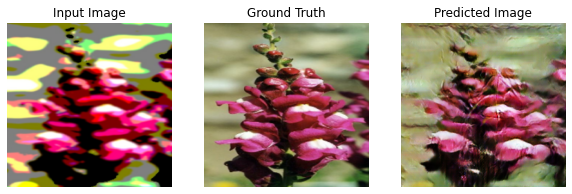

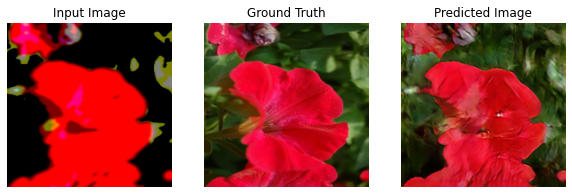

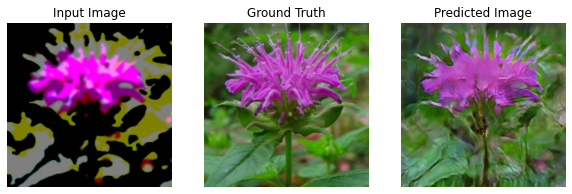

In [22]:
train(train_dataset, 150 )

##  Thaks to: 
- https://github.com/Diaz-De-Vivar/Generate-blurry-images-Python-code./blob/master/Posterizar_Distorsionar_Saturar.py
- https://www.youtube.com/watch?v=YsrMGcgfETY
- https://www.tensorflow.org/tutorials/generative/pix2pix#build_the_discriminator